In [16]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from graphviz import Source
from sklearn.tree import export_graphviz

In [2]:
red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

red_wine['color'] = 1.
white_wine['color'] = 0.

wine = pd.concat([red_wine, white_wine])

In [3]:
X = wine.drop(['color'], axis=1)
y = wine['color']

In [5]:
estimators = [('scaler', StandardScaler()),
              ('clf', DecisionTreeClassifier())]

pipe = Pipeline(estimators)

In [6]:
pipe.steps

[('scaler', StandardScaler()), ('clf', DecisionTreeClassifier())]

In [7]:
pipe.steps[0]

('scaler', StandardScaler())

In [8]:
pipe.steps[1]

('clf', DecisionTreeClassifier())

In [9]:
pipe['scaler']

StandardScaler()

In [10]:
pipe.set_params(clf__max_depth=2)
pipe.set_params(clf__random_state=13)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=13,
                                                    stratify=y)
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))])

In [15]:
y_pred_tr = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Teat Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.9657494708485664
Teat Acc :  0.9576923076923077


## check model akitacture

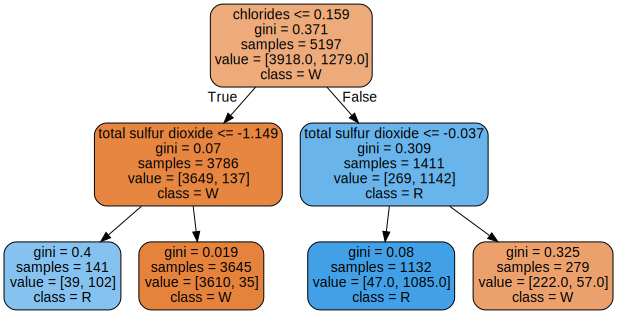

In [17]:
Source(export_graphviz(pipe['clf'], feature_names=X_train.columns,
                       class_names=['W', 'R'],
                       rounded=True, filled=True))